# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources in the README.md file
- Happy learning!

In [2]:
# Import your libraries:
import pandas as pd
from sklearn.datasets import load_diabetes
import numpy as np

# Challenge 1 - Explore the Scikit-Learn Datasets

Before starting to work on our own datasets, let's first explore the datasets that are included in this Python library. These datasets have been cleaned and formatted for use in ML algorithms.

First, we will load the diabetes dataset. Do this in the cell below by importing the datasets and then loading the dataset  to the `diabetes` variable using the `load_diabetes()` function.

In [4]:
# Your code here:
from sklearn import datasets
diabetes = datasets.load_diabetes()

Let's explore this variable by looking at the different attributes. Do this by looking at the `keys()` of this variable.

In [6]:
# Your code here:
print(diabetes.keys())

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename', 'data_module'])


The next step is to read the description of the dataset. Print the description in the cell below using the `DESCR` attribute of the `diabetes` variable

In [8]:
# Your code here:
print (diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log of serum triglycerides level
    - s6      glu, blood sugar level

Note: Each of these 10 feature variables have bee

What are the variables in this dataset according to the description? List them in the markdown cell below

   - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

#### Enter your answer here:

age, sex, body mass index, average blood pressure, s1, s2, s3, s4, s5, s6




Now explore the data. Scikit-learn typically takes in 2D numpy arrays as input (though pandas dataframes are also accepted). In the cell below find the shape of the numpy array contained in the data portion of the diabetes variable.

In [10]:
# Your code here:
print("Shape of data array:", diabetes.data.shape)

Shape of data array: (442, 10)


# Challenge 2 - Perform Supervised Learning on the Dataset

#### The data has already been split to predictor and response variables. The response variable is in the `target` portion of the variable. 

Given this information, let's apply what we have previously learned about linear regression and apply the algorithm to the diabetes dataset. In the cell below, import the linear regression class from sklearn. 

In [12]:
# Your code here:
from sklearn.linear_model import LinearRegression

Initialize the model in the variable `diabetes_model`

In [14]:
# Your code here:
diabetes_model = LinearRegression()

In the cell below, fit the model and print the intercept and coefficients of the model. 

In [16]:
# Your code here:
# Load dataset
diabetes = load_diabetes()
diabetes_data = diabetes.data  # Features
diabetes_target = diabetes.target  # Target variable

# Convert to DataFrame for easier selection
diabetes_df = pd.DataFrame(diabetes_data, columns=diabetes.feature_names)

# Select 'bp' column as the feature
X = diabetes_df[['bp']].values  # Ensure it's 2D
y = diabetes_target  # Target variable

# Initialize and fit model
model = LinearRegression()
model.fit(X, y)

# Print results
print("Intercept:", model.intercept_)
print("Coefficient:", model.coef_)

Intercept: 152.13348416289597
Coefficient: [714.7382595]


# Bonus Challenge 1 - Conduct a Hypothesis Test on the Model

Once we have generated a linear model, we can test each coefficient using a t-test to see whether the confidence interval for the variable contains zero. We can also perform an overall F test to check whether at least one coefficient is significantly different from zero. 

Refer to the resource in this [link](https://onlinecourses.science.psu.edu/stat501/node/297/) for more details and perform the t-tests for the model above. Additionally, interpret the results and list coefficients are significantly different from zero.


Hint: use the statsmodels package.

Result should look like this:

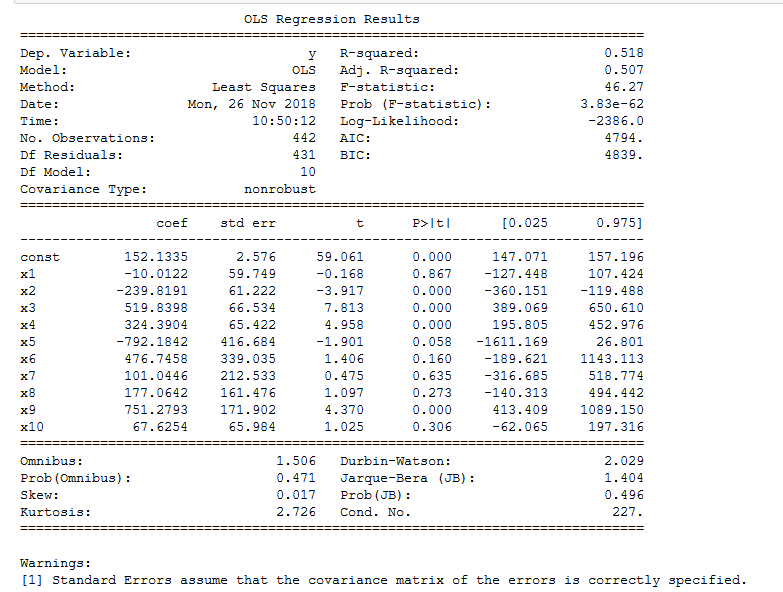

In [22]:
# Your code here:
import statsmodels.api as sm
import pandas as pd
from sklearn.datasets import load_diabetes

# Load dataset
diabetes = load_diabetes()
diabetes_data = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
y = diabetes.target  # Target variable

# Add a constant term for intercept
X = sm.add_constant(diabetes_data)

# Fit the model using OLS (Ordinary Least Squares)
model = sm.OLS(y, X).fit()

# Display the summary, which includes t-tests for each coefficient
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.518
Model:                            OLS   Adj. R-squared:                  0.507
Method:                 Least Squares   F-statistic:                     46.27
Date:                Mon, 24 Feb 2025   Prob (F-statistic):           3.83e-62
Time:                        13:59:28   Log-Likelihood:                -2386.0
No. Observations:                 442   AIC:                             4794.
Df Residuals:                     431   BIC:                             4839.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        152.1335      2.576     59.061      0.0

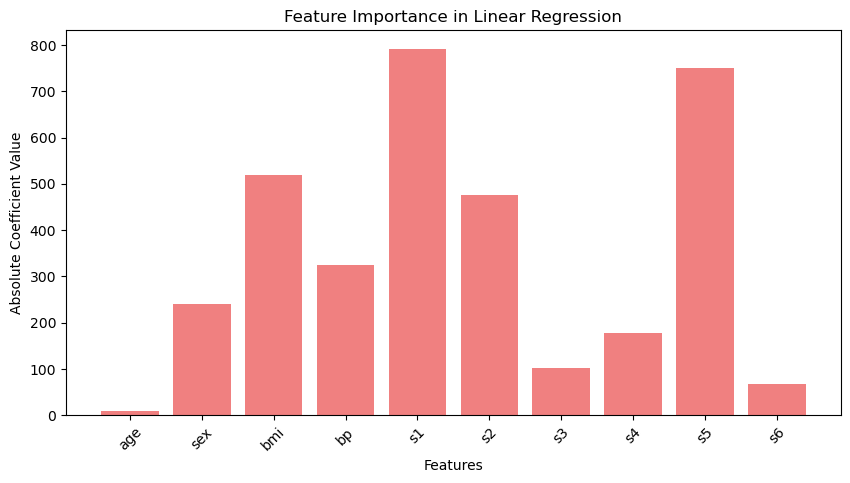

In [28]:
plt.figure(figsize=(10, 5))
plt.bar(features, np.abs(coef), color='lightcoral')
plt.xticks(rotation=45)
plt.xlabel("Features")
plt.ylabel("Absolute Coefficient Value")
plt.title("Feature Importance in Linear Regression")
plt.show()

# Challenge 3 - Peform Supervised Learning on a Pandas Dataframe

Now that we have looked at data that has been formatted for scikit-learn, let's look at data that we will need to format ourselves.

In the next cell, load the `auto-mpg.csv` file included in this folder and assign it to a variable called `auto`.

In [36]:
# Your code here:
auto = pd.read_csv("auto-mpg.csv")

Look at the first 5 rows using the `head()` function:

In [38]:
# Your code here:
print(auto.head(5))

    mpg  cylinders  displacement  horse_power  weight  acceleration  \
0  18.0          8         307.0        130.0    3504          12.0   
1  15.0          8         350.0        165.0    3693          11.5   
2  18.0          8         318.0        150.0    3436          11.0   
3  16.0          8         304.0        150.0    3433          12.0   
4  17.0          8         302.0        140.0    3449          10.5   

   model_year                       car_name  
0          70  \t"chevrolet chevelle malibu"  
1          70          \t"buick skylark 320"  
2          70         \t"plymouth satellite"  
3          70              \t"amc rebel sst"  
4          70                \t"ford torino"  


Evaluate the data to ensure that all numeric columns are correctly detected as such by pandas. If a column is misclassified as object, coerce it to numeric.

In [40]:
# Your code here:
print(auto.dtypes)

mpg             float64
cylinders         int64
displacement    float64
horse_power     float64
weight            int64
acceleration    float64
model_year        int64
car_name         object
dtype: object


In [42]:
# Convert all object columns to numeric, coercing errors to NaN if necessary
for col in auto.columns:
    if auto[col].dtype == "object":
        auto[col] = pd.to_numeric(auto[col], errors="coerce")

# Verify changes
print(auto.dtypes)

mpg             float64
cylinders         int64
displacement    float64
horse_power     float64
weight            int64
acceleration    float64
model_year        int64
car_name        float64
dtype: object


In [44]:
print(auto.isnull().sum())  # See if any columns now have NaN values

mpg               0
cylinders         0
displacement      0
horse_power       6
weight            0
acceleration      0
model_year        0
car_name        398
dtype: int64


In [80]:
print(auto["model_year"].isnull().sum())  # Count missing values
print(auto["model_year"].dtype)  # Check data type
print(auto["model_year"].unique())  # Inspect unique values

0
int64
[]


In [88]:
auto = pd.read_csv("auto-mpg.csv")  # Reload dataset
print(auto.isnull().sum())  # Check missing values before dropping anything
print(auto.shape)  # Check how many rows exist
print(auto["model_year"].describe())  # Check range of years

mpg             0
cylinders       0
displacement    0
horse_power     6
weight          0
acceleration    0
model_year      0
car_name        0
dtype: int64
(398, 8)
count    398.000000
mean      76.010050
std        3.697627
min       70.000000
25%       73.000000
50%       76.000000
75%       79.000000
max       82.000000
Name: model_year, dtype: float64


What is the newest model year and the oldest model year?

In [108]:
auto["model_year"] = auto["model_year"] - 1900

In [110]:
# Your code here:
print("Oldest model year:", int(auto["model_year"].min()))
print("Newest model year:", int(auto["model_year"].max()))

Oldest model year: 1970
Newest model year: 1982


Check the dataset for missing values and remove all rows containing at least one missing value.

In [114]:
# Your code here:
auto.dropna(inplace=True)
print(auto.isnull().sum())

mpg             0
cylinders       0
displacement    0
horse_power     0
weight          0
acceleration    0
model_year      0
car_name        0
dtype: int64


In [116]:
auto.dropna(axis=0, how="any", inplace=True)

Find the frequency table for the `cylinders` column using the `value_counts()` function. How many possible values of cylinders are there?

In [118]:
# Your code here:
print(auto["cylinders"].value_counts())

cylinders
4    199
8    103
6     83
3      4
5      3
Name: count, dtype: int64


We would like to generate a linear regression model that will predict mpg. To do this, first drop the `car_name` column since it does not contain any quantitative data. Next separate the dataframe to predictor and response variables. Separate those into test and training data with 80% of the data in the training set and the remainder in the test set. 

Assign the predictor and response training data to `X_train` and `y_train` respectively. Similarly, assign the predictor and response test data to `X_test` and `y_test`.

In [126]:
print(auto.columns)

Index(['mpg', 'cylinders', 'displacement', 'horse_power', 'weight',
       'acceleration', 'model_year'],
      dtype='object')


In [128]:
# Your code here:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# 1. Separate the predictor variables (X) and the response variable (y)
X = auto.drop(columns=['mpg'])  # 'mpg' is the target variable
y = auto['mpg']

# 2. Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Create the linear regression model and fit it to the training data
model = LinearRegression()
model.fit(X_train, y_train)

# 4. Make predictions on the test set
y_pred = model.predict(X_test)

# 5. Evaluate the model (e.g., using mean squared error)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 10.50237032941741


Now we will the dataset that we processed and peform linear regression on this data to predict the mpg for each vehicle. Initialize the model in the cell below.

In [134]:
# Your code here:
model = LinearRegression()

Next, fit the model in the cell below.

In [136]:
# Your code here:
model.fit(X_train, y_train)

LinearRegression()

# Challenge 4 - Evaluate the Model

the r squared score of a model tells us how much variation is explained by the model. In a typical dataset, most observations differ from the mean. When we create a model, we are trying to generate an equation that will tell us by how much each observation will differ from the mean. Obviously, the vast majority of models are not perfect. They can only predict some of the variation from the mean but not all of it. We attribute the rest of the difference between the actual value and the mean to random error. We would like random error to explain the as little as possible of the variation. This is why the r squared score is an important metric.

In the next cell, compute the r squared score of the model. Do this by first computing the predicted values and assign them to `y_pred`.

In [138]:
# Your code here:
# Predict the target variable (mpg) using the trained model
y_pred = model.predict(X_test)

# Compute the R-squared score
r_squared = model.score(X_test, y_test)

# Print the R-squared score
print(f"R-squared score: {r_squared}")

R-squared score: 0.794234907542857


#### Our next step is to evaluate the model using the test data. We would like to ensure that our model is not overfitting the data. This means that our model will not be able to generalize well outside of the training data.

In the cell below, use the model to generate the predicted values for the training data and assign them to `y_test_pred`. Compute the r squared score for the test data by comparing the oberserved `y_train` data and the predicted `y_test_pred`.

In [140]:
# Your code here:
# Predict the target variable (mpg) using the trained model on the training data
y_train_pred = model.predict(X_train)

# Compute the R-squared score for the training data
r_squared_train = model.score(X_train, y_train)

# Print the R-squared score for the training data
print(f"R-squared score on training data: {r_squared_train}")

R-squared score on training data: 0.810722795309389


# Challenge 5 - Improve the Model Fit

While the most common way to improve the fit of a model is by using regularization, there are other simpler ways to improve model fit. The first is to create a simpler model. The second is to increase the train sample size.

Let us start with the easier option and increase our train sample size to 90% of the data. Create a new test train split and name the new predictors and response variables `X_train09`, `X_test09`, `y_train09`, `y_test09`.

In [142]:
# Your code here:
# Split the data into new training and testing sets (90% train, 10% test)
X_train09, X_test09, y_train09, y_test09 = train_test_split(X, y, test_size=0.1, random_state=42)

# Verify the new split (optional, just to check the size)
print(f"Training set size: {X_train09.shape[0]}, Test set size: {X_test09.shape[0]}")

Training set size: 352, Test set size: 40


Initialize a new model. Name this model `auto_model09`. Fit the model to the new sample data.

In [144]:
# Your code here:
auto_model09 = LinearRegression()
auto_model09.fit(X_train09, y_train09)

LinearRegression()

Compute the predicted values and r squared score for our new model and new sample data.

In [152]:
# Your code here:
y_test_pred09 = auto_model09.predict(X_test09)

r_squared_test09 = auto_model09.score(X_test09, y_test09)

print(f"R-squared score on the new test data: {r_squared_test09}")

R-squared score on the new test data: 0.8468911998183246


Compute the r squared score for the smaller test set. Is there an improvement in the test r squared?

In [155]:
# Your code here:
r_squared_test_original = auto_model09.score(X_test, y_test)
print(f"R-squared score on the original test data (20%): {r_squared_test_original}")

R-squared score on the original test data (20%): 0.8014534213070545


# Bonus Challenge 2 - Backward Elimination 

The main way to produce a simpler linear regression model is to reduce the number of variables used in the model. In scikit-learn, we can do this by using recursive feature elimination. You can read more about RFE [here](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html).

In the next cell, we will import RFE

In [161]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

Follow the documentation and initialize an RFE model using the `auto_model` linear regression model. Set `n_features_to_select=3`

In [164]:
# Your code here:
# Re-initialize the Linear Regression model
auto_model09 = LinearRegression()

# Fit the model to the new training data (X_train09 and y_train09)
auto_model09.fit(X_train09, y_train09)

# Initialize the RFE model with auto_model09 and set n_features_to_select=3
rfe = RFE(estimator=auto_model09, n_features_to_select=3)

# Fit RFE to the training data (X_train09 and y_train09)
rfe.fit(X_train09, y_train09)

# Print the selected features
selected_features = X_train09.columns[rfe.support_]
print(f"Selected features: {selected_features}")

# Print the ranking of features (1 means the feature is selected)
print(f"Feature ranking: {rfe.ranking_}")

Selected features: Index(['cylinders', 'acceleration', 'model_year'], dtype='object')
Feature ranking: [1 3 4 2 1 1]


Feature importance is ranked from most important (1) to least important (4). Generate a model with the three most important features. The features correspond to variable names. For example, feature 1 is `cylinders` and feature 2 is `displacement`.

Perform a test-train split on this reduced column data and call the split data `X_train_reduced`, `X_test_reduced`, `y_test_reduced`, `y_train_reduced`. Use an 80% split.

In [166]:
# Your code here:
# Get the selected features (with ranking 1)
selected_columns = X_train09.columns[rfe.support_]

# Create a reduced dataset with only the 3 most important features
X_reduced = X_train09[selected_columns]

# Perform train-test split on the reduced dataset (80% train, 20% test)
X_train_reduced, X_test_reduced, y_train_reduced, y_test_reduced = train_test_split(
    X_reduced, y_train09, test_size=0.2, random_state=42)

# Verify the new split (optional, just to check the size)
print(f"Training set size: {X_train_reduced.shape[0]}, Test set size: {X_test_reduced.shape[0]}")

Training set size: 281, Test set size: 71


Generate a new model called `auto_model_reduced` and fit this model. Then proceed to compute the r squared score for the model. Did this cause an improvement in the r squared score?

In [168]:
# Your code here:
# Initialize a new Linear Regression model for the reduced dataset
auto_model_reduced = LinearRegression()

# Fit the model to the reduced training data (X_train_reduced and y_train_reduced)
auto_model_reduced.fit(X_train_reduced, y_train_reduced)

# Compute the R-squared score for the reduced model on the test data (X_test_reduced and y_test_reduced)
r_squared_reduced = auto_model_reduced.score(X_test_reduced, y_test_reduced)

# Print the R-squared score
print(f"R-squared score on the reduced model: {r_squared_reduced}")

R-squared score on the reduced model: 0.6420650907470111
